# Ejercicio Regresión Lineal Simple y Múltiple (2024-05-29)
Por: Ángela Daniela Córdoba Álvarez

## Vídeo Regresión Simple

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creamos un dataset, que ya fue proporcionado en el vídeo
x = [1, 2, 2, 3, 4, 4, 5, 6]
y = [2, 3, 4, 4, 4, 6, 5, 7]

data_dict = {"x":x,
             "y":y}

# Convertimos el diccionario en un dataframe
df = pd.DataFrame(data_dict)
df # Lo imprimimos

,x,y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


Procedemos a calcular las columnas que disponen del cálculo del producto de $xy$ y $x^2$.

In [2]:
# Cálculo nuevas columnas
df["xy"] = df["x"] * df["y"]
df["x2"] = df["x"] ** 2
df

,x,y,xy,x2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36


In [3]:
# Hallamos también la suma total de cada columna
suma_x = df["x"].sum()
suma_y = df["y"].sum()
suma_xy = df["xy"].sum()
suma_x2 = df["x2"].sum()

print("Suma de x:", suma_x)
print("Suma de y:", suma_y)
print("Suma de xy:", suma_xy)
print("Suma de x2:", suma_x2)

Suma de x: 27
Suma de y: 35
Suma de xy: 135
Suma de x2: 111


El siguiente paso es hallar la pendiente y el punto de corte de acuerdo al dataset dado.

In [4]:
n = len(df)
m = ((n * suma_xy) - (suma_x * suma_y)) / ((n * suma_x2) - (suma_x ** 2))
print("Pendiente:", m)

Pendiente: 0.8490566037735849


In [5]:
b = (suma_y / n) - (m * (suma_x / n))
print("Punto de corte:", b)

Punto de corte: 1.5094339622641506


In [6]:
x_final = df["x"].max()
y_final = m * x_final + b
print("Punto final:", y_final)

Punto final: 6.60377358490566


In [7]:
# Crear un nuevo dataset para los extremos de la línea
x_final = [0,x_final]
y_final = [b,y_final]

dict_f = {"xf":x_final,
               "yf":y_final}

df1 = pd.DataFrame(dict_f)
df1

,xf,yf
0,0,1.509434
1,6,6.603774


Hacemos el gráfico de dispersión.

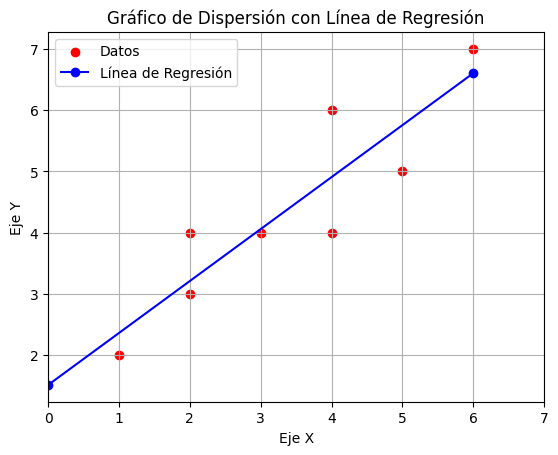

In [8]:
# Crear la figura y el eje
fig, ax = plt.subplots()

# Gráfico de dispersión
ax.scatter(x, y, label='Datos', color='red')
ax.plot(x_final, y_final, label='Línea de Regresión', marker='o', color='blue')

# Etiquetas y título
plt.title('Regresión Lineal Simple')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
ax.set_xlim(0, 7)
ax.set_title('Gráfico de Dispersión con Línea de Regresión')
ax.grid(True)
plt.grid(True)
ax.legend()

# Mostrar el gráfico
plt.show()


Continuamos con el problema presentado al final del vídeo, acerca de hallar los diferentes $S_r$: la suma de los cuadrados del residual.

In [9]:
# Cálculo S_r
df["y_pred"] = m * df["x"] + b # Son los valores predichos
df["sr"] = (df["y"] - df["y_pred"]) # Halla el residual (diferencia entre los valores observados y predichos)
df["sr2"] = df["sr"] ** 2 # Halla el residual al cuadrado
df["sr2"].sum() # Halla S_r sumando los cuadrados de los residuos
print("Suma de cuadrados del residual:", df["sr2"].sum())

Suma de cuadrados del residual: 3.5471698113207544
